<a href="https://colab.research.google.com/github/mohmaed7777/GameStop-Historical-Stock-Prices/blob/main/GameStop_Historical_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Description:**



**GameStop Corp**: is an American video game, consumer electronics, and gaming merchandise retailer. GameStop's stocks have spiked in recent days since the Reddit group blew up the stock price. Now GameStop is up more than 1,700% since the start of January. so it is interesting to try to predict the stock prices in the next months and see how prediction and time series models will perform in this case. This Dataset is a daily historical stock price of GameStop from February 2002 (the year it was listed) to January 2021.

**Content:**

The dataset contains:

**Date:**
The date of trading

**Open_price:**
The opening price of the stock

**High_price:**
The high price of that day

**Low_price:**
The low price of that day

**Close_price:**
The closed price of that day

**Volume:**
The amount of stocks traded during that day

**Adjclose_price:**
The stock's closing price has been amended to include any distributions/corporate actions that occur before the next days open.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
sns.set()
%pylab inline 
%config InlineBackend.figure_formats=['retina']
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)
print('Setup complete^____^')

Populating the interactive namespace from numpy and matplotlib
Setup complete^____^


In [2]:
game_stoke = pd.read_csv('/content/GME_stock.csv')
game_stoke.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


In [3]:
game_stoke.shape

(4773, 7)

In [4]:
game_stoke['date'].dtypes

dtype('O')

In [5]:
missing_data = game_stoke.isnull().sum()
missing_data[:]

date              0
open_price        0
high_price        0
low_price         0
close_price       0
volume            0
adjclose_price    0
dtype: int64

In [6]:
game_stoke.columns.tolist()

['date',
 'open_price',
 'high_price',
 'low_price',
 'close_price',
 'volume',
 'adjclose_price']

In [7]:
game_stoke.drop(['date'], axis=1, inplace=True)
game_stoke.head(2)

,open_price,high_price,low_price,close_price,volume,adjclose_price
0,265.000000,483.0,112.25,193.600006,58815800.0,193.600006
1,354.829987,380.0,249.00,347.510010,93396700.0,347.510010


In [8]:
game_stoke.describe()

,open_price,high_price,low_price,close_price,volume,adjclose_price
count,4773.000000,4773.000000,4773.000000,4773.000000,4.773000e+03,4773.000000
mean,23.201005,23.693590,22.714309,23.193234,3.398255e+06,16.882897
std,14.695884,16.210219,13.628194,14.513893,6.547035e+06,11.019953
min,2.850000,2.940000,2.570000,2.800000,6.500000e+04,2.555174
25%,11.360000,11.575000,11.130000,11.350000,1.528900e+06,9.607993
50%,21.760000,22.110001,21.430000,21.760000,2.491800e+06,15.479172
75%,29.420000,30.170000,28.719999,29.430000,3.791600e+06,22.205433
max,354.829987,483.000000,249.000000,347.510010,1.967843e+08,347.510010


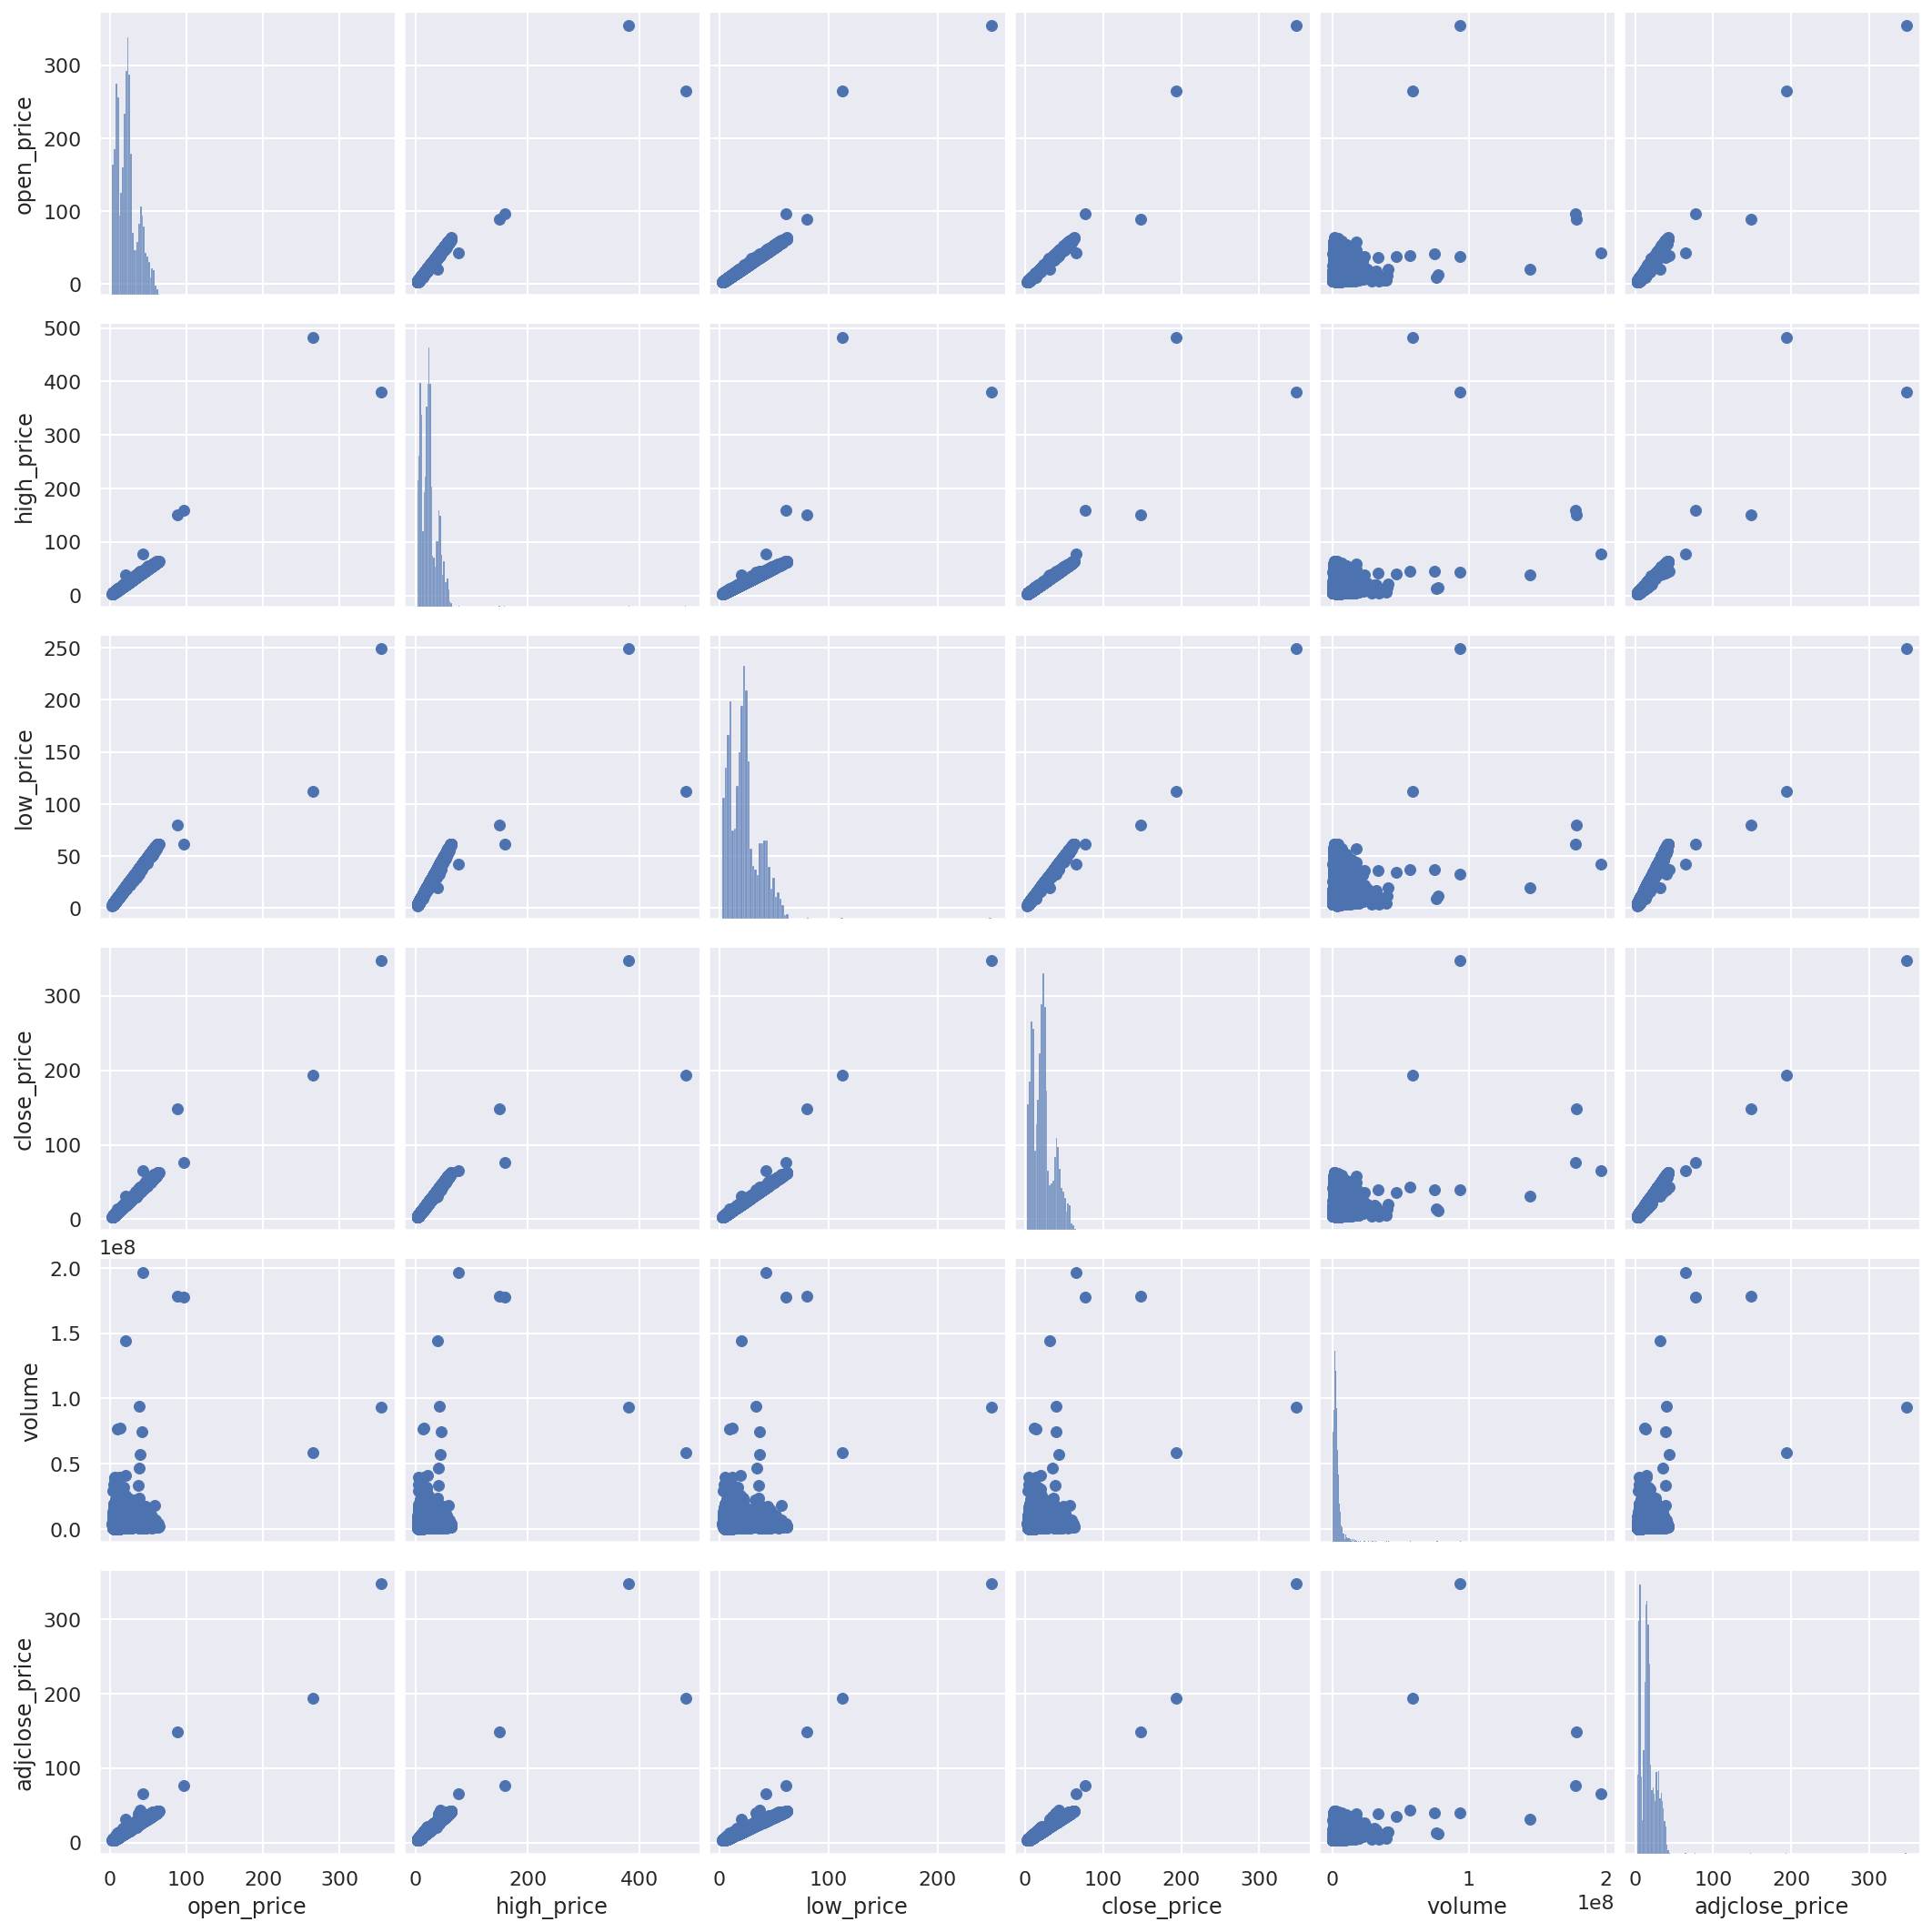

In [9]:
sns.pairplot(game_stoke, plot_kws=dict(alpha=1, edgecolor=None))

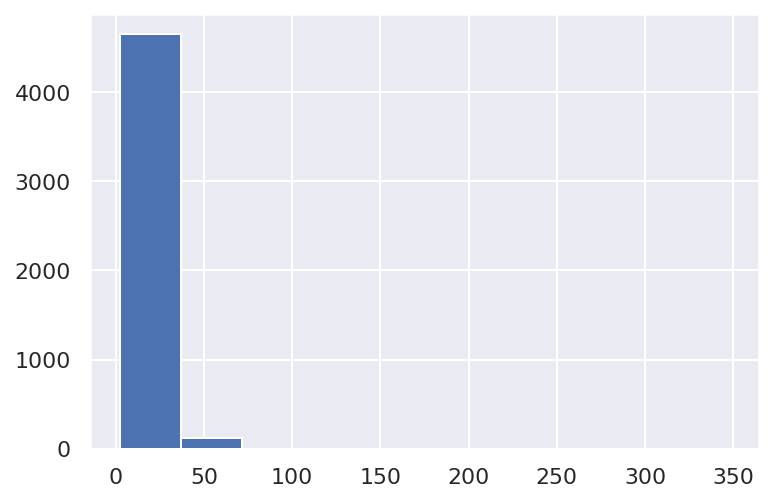

In [ ]:
# Variable Tranformation : 
game_stoke.adjclose_price.hist();

In [ ]:
# Log transformation : 
# Create alist of  float columns to check for skewing : 
num_cols = game_stoke.select_dtypes('number').columns
skew_limit = 0.75 
skew_vals = game_stoke[num_cols].skew()
# Showing the skewed columns : 
skew_cols = skew_vals[abs(skew_vals) > skew_limit].sort_values(ascending=False)
skew_cols

volume            18.207818
high_price         7.581501
adjclose_price     7.268106
open_price         3.858436
close_price        3.312503
low_price          1.605694
dtype: float64

In [ ]:
# We need to check  our target value  is Normally distributed or not : 
from scipy.stats.mstats import normaltest


In [ ]:
normaltest(game_stoke.adjclose_price.values)

NormaltestResult(statistic=6543.386587740895, pvalue=0.0)

In [ ]:
# Create the Linear Regression Model : 
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Create X and Y :
game_stoke

,open_price,high_price,low_price,close_price,volume,adjclose_price
0,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002
...,...,...,...,...,...,...
4768,9.600000,9.875000,9.525000,9.875000,1723200.0,6.648838
4769,9.900000,9.900000,9.375000,9.550000,1852600.0,6.430017
4770,10.000000,10.025000,9.850000,9.950000,2097400.0,6.699336
4771,10.175000,10.195000,9.925000,10.000000,2755400.0,6.733003


In [ ]:
y = game_stoke['adjclose_price']
y

0       193.600006
1       347.510010
2       147.979996
3        76.790001
4        65.010002
           ...    
4768      6.648838
4769      6.430017
4770      6.699336
4771      6.733003
4772      6.766666
Name: adjclose_price, Length: 4773, dtype: float64

In [ ]:
game_stoke.columns

Index(['open_price', 'high_price', 'low_price', 'close_price', 'volume',
       'adjclose_price'],
      dtype='object')

In [ ]:
x = game_stoke[['open_price', 'high_price', 'low_price', 'close_price', 'volume']]
x

,open_price,high_price,low_price,close_price,volume
0,265.000000,483.000000,112.250000,193.600006,58815800.0
1,354.829987,380.000000,249.000000,347.510010,93396700.0
2,88.559998,150.000000,80.199997,147.979996,178588000.0
3,96.730003,159.179993,61.130001,76.790001,177874000.0
4,42.590000,76.760002,42.320000,65.010002,196784300.0
...,...,...,...,...,...
4768,9.600000,9.875000,9.525000,9.875000,1723200.0
4769,9.900000,9.900000,9.375000,9.550000,1852600.0
4770,10.000000,10.025000,9.850000,9.950000,2097400.0
4771,10.175000,10.195000,9.925000,10.000000,2755400.0


In [ ]:
# Create polynomial Features : 
pf = PolynomialFeatures(degree=2, include_bias=False)
x_pf = pf.fit_transform(x)

In [ ]:
x.shape

(4773, 5)

In [ ]:
x_pf.shape

(4773, 20)

In [ ]:
# Train Test split : 
x_train, x_test, y_train, y_test = train_test_split(x_pf, y, test_size=0.3, random_state=72018)


In [ ]:
# Fit standard on x_train : 
x_train.shape

(3341, 20)

In [ ]:
s = StandardScaler()
x_train_s = s.fit_transform(x_train)
x_train_s.shape

(3341, 20)

In [ ]:
# Y value transformation : 
from scipy.stats import boxcox 
bc_result = boxcox(y_train)
y_train_bc = bc_result[0]
lam = bc_result[1]

In [ ]:
y_train_bc

array([4.37111238, 4.64937642, 4.15332744, ..., 4.28628052, 5.80060269,
       4.4838074 ])

In [ ]:
# Fit the model : 
lr.fit(x_train_s, y_train_bc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_test_s = s.transform(x_test)
y_pred_bc = lr.predict(x_test_s)

In [ ]:
# Make a prediction and compared with the transformed y_test values : 
y_pred_bc[:5]

array([5.80136468, 6.01678977, 2.49470776, 4.16887423, 4.8784128 ])

In [ ]:
# Transform the y_test value : 
bc_result_test = boxcox(y_test)
y_test_bc = bc_result_test[0]
y_test_bc[:5]

array([5.4993538 , 5.6808955 , 2.30873428, 3.84984805, 4.42643458])

In [ ]:
print([y_pred_bc[:5]], y_test_bc[:5])

[array([5.80136468, 6.01678977, 2.49470776, 4.16887423, 4.8784128 ])] [5.4993538  5.6808955  2.30873428 3.84984805 4.42643458]
